In [2]:
import pandas as pd
import numpy as np

In [3]:
folder = "/home/ggobert/Downloads" #42
folder = "/Users/gregoiregobert/Downloads/42" #mac perso
df = pd.read_csv(folder + "/datasets/dataset_train.csv")

In [22]:
df.describe()

,Index,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1600.00000,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,799.50000,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,462.02453,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,0.00000,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,399.75000,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,799.50000,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,1199.25000,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,1599.00000,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


In [5]:
num_col = []

for column in df.columns:
    if df[f'{column}'].apply(type).eq(float).all():
        num_col.append(column)

In [6]:
def my_count(serie):
    n = 0
    serie = serie.dropna()
    for _ in serie:
        n += 1
    return n

In [7]:
def my_min(serie):
    min = serie[0]
    for i in serie:
        if i < min:
            min = i
    return min

In [8]:
def my_max(serie):
    max = serie[0]
    for i in serie:
        if i > max:
            max = i
    return max

In [9]:
def my_mean(serie):
    serie = serie.dropna()
    size = my_count(serie)

    add_all = 0
    for i in serie:
        add_all += i
    return add_all / size

In [10]:
def my_std(serie):
    serie = serie.dropna()
    
    # Étape 1 : moyenne
    mean = sum(serie) / len(serie)

    # Étape 2 & 3 : somme des carrés des écarts à la moyenne
    squared_diffs = [(i - mean) ** 2 for i in serie]
    sum_squared_diffs = sum(squared_diffs)

    # Étape 4 : division par (n - 1)
    variance = sum_squared_diffs / (len(serie) - 1)

    # Étape 5 : racine carrée
    std_dev = variance ** 0.5

    return std_dev

In [11]:
def my_quantile(serie, percent):
    serie = serie.dropna()
    size = my_count(serie)
    div = percent * (size - 1)
    serie = serie.sort_values().reset_index(drop=True)

    lower = int(div)
    upper = lower + 1
    fraction = div - lower

    if upper < size:
        # Interpolation lineaire : on va rajouter à la valeur d'en dessous du pourcentage, la fraction manquante: (i[26%] - i[24%]) * (25% - 24%)
        return serie.iloc[lower] + (serie.iloc[upper] - serie.iloc[lower]) * fraction
    else:
        return serie.iloc[lower]

In [12]:
df_describe = pd.DataFrame(columns=num_col)

df_describe.loc['count'] = [my_count(df[col]) for col in num_col]
df_describe.loc['mean']  = [my_mean(df[col]) for col in num_col]
df_describe.loc['std']   = [my_std(df[col]) for col in num_col]
df_describe.loc['min']   = [my_min(df[col]) for col in num_col]
df_describe.loc['25%']   = [my_quantile(df[col], 0.25) for col in num_col]
df_describe.loc['50%']   = [my_quantile(df[col], 0.5) for col in num_col]
df_describe.loc['75%']   = [my_quantile(df[col], 0.75) for col in num_col]
df_describe.loc['max']   = [my_max(df[col]) for col in num_col]

In [ ]:
df_describe

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


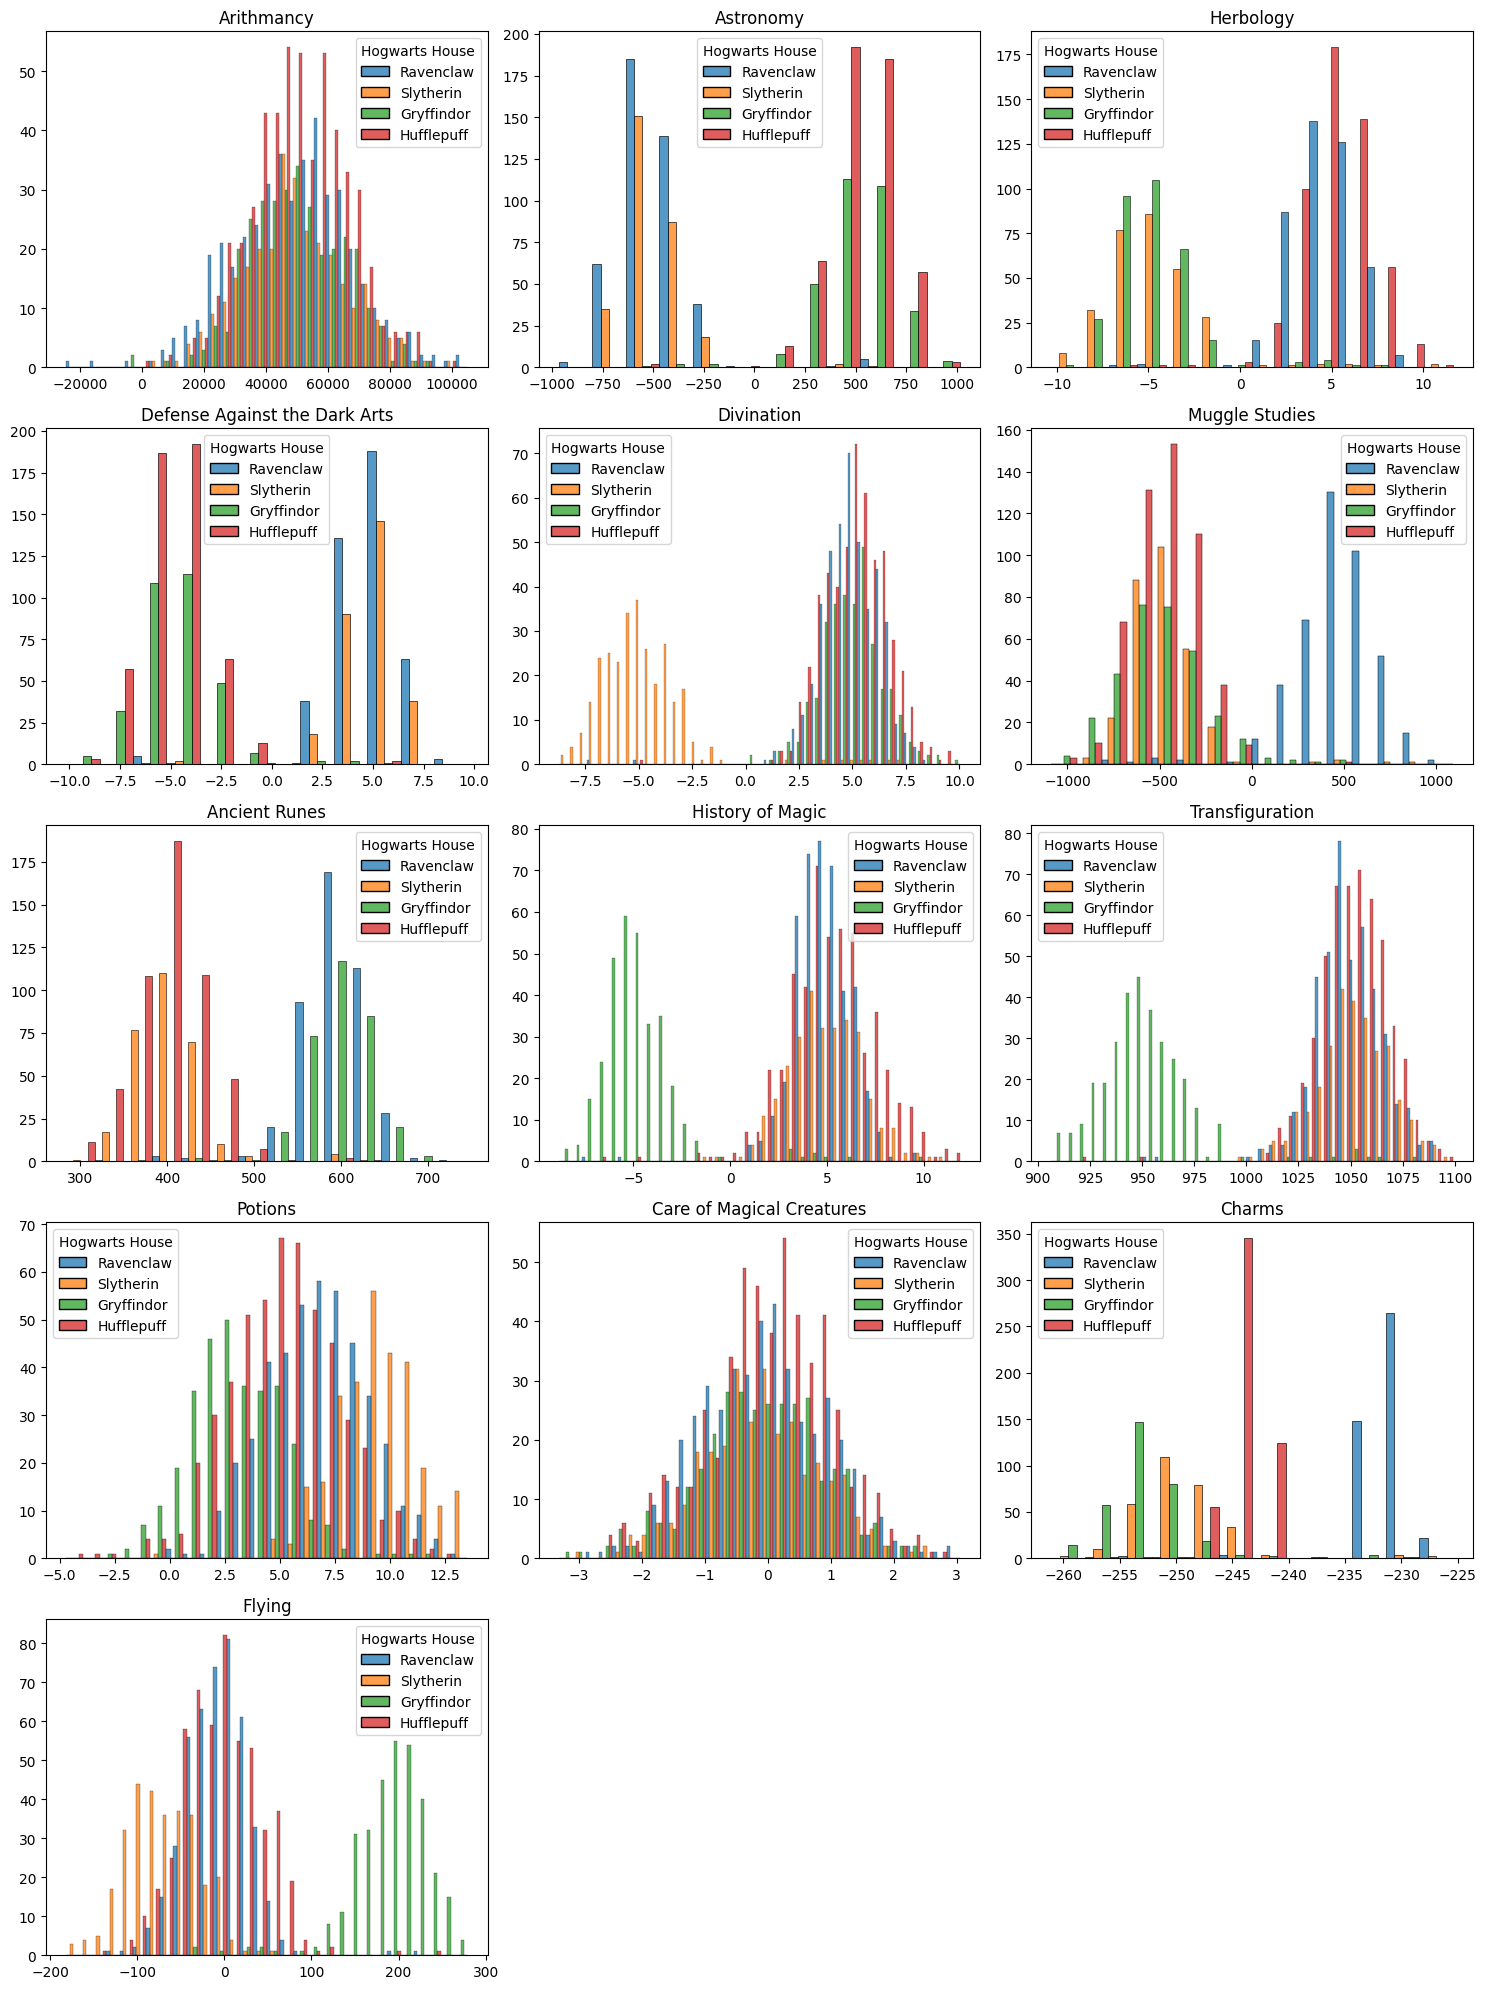

In [46]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

df_course = df[num_col].copy()
df_course['Hogwarts House'] = df['Hogwarts House']

# Colonnes matières : toutes sauf 'Hogwarts House'
cols_a_tracer = [col for col in df_course.columns if col != 'Hogwarts House']

n = len(cols_a_tracer)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()  # Pour pouvoir boucler facilement

for i, col in enumerate(cols_a_tracer):
    sns.histplot(
        data=df_course,
        x=col,
        hue='Hogwarts House',
        multiple='dodge',
        bins='auto',
        ax=axes[i]
    )
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Supprimer les axes inutilisés si nombre de matières pas multiple de 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
